Day 1 learning pandas!

In [146]:
import pandas as pd

In [147]:
# 2 main datatypes
series = pd.Series(["feetsAI","OpenAI","xAI"])

In [148]:
series

0    feetsAI
1     OpenAI
2        xAI
dtype: object

In [149]:
# series = 1-dimensional
mc = pd.Series(["3bn","24bn","7bn"])
mc

0     3bn
1    24bn
2     7bn
dtype: object

In [150]:
# DataFrame = 2-dimensional
company_value = pd.DataFrame({"Company":series, "Market cap":mc})
company_value

,Company,Market cap
0,feetsAI,3bn
1,OpenAI,24bn
2,xAI,7bn


In [151]:
compare = pd.read_csv("c.csv")
compare

,Make,Colour,Time,Parameters,Price
0,OpenAI,White,7,126000,$20.00
1,xAI,Red,6,39000,$7.00
2,OpenAI,Blue,6,126000,$20.00
3,xAI,Black,8,39000,$13.00
4,OpenAI,White,5,126000,$7.00
5,feetsAI,Green,9,44000,$20.00
6,xAI,Blue,6,39000,$30.00
7,feetsAI,Blue,2,44000,$20.00
8,xAI,White,4,77000,$13.00
9,OpenAI,White,2,330000,$25.00


In [152]:
# Exporting a dataframe
compare.to_csv("exported_c.csv")


In [153]:
# Describe Data
compare.dtypes

Make          object
Colour        object
Time           int64
Parameters     int64
Price         object
dtype: object

In [154]:
compare.describe()

,Time,Parameters
count,10.000000,10.000000
mean,5.500000,99000.000000
std,2.321398,89988.888203
min,2.000000,39000.000000
25%,4.250000,40250.000000
50%,6.000000,60500.000000
75%,6.750000,126000.000000
max,9.000000,330000.000000


In [155]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Make        10 non-null     object
 1   Colour      10 non-null     object
 2   Time        10 non-null     int64 
 3   Parameters  10 non-null     int64 
 4   Price       10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [156]:
compare.mean(numeric_only=True)

Time              5.5
Parameters    99000.0
dtype: float64

In [157]:
compare["Make"].sum()

'OpenAIxAIOpenAIxAIOpenAIfeetsAIxAIfeetsAIxAIOpenAI'

In [158]:
len(compare)

10

## Viewing and selecting data

In [159]:
compare.head(6)

,Make,Colour,Time,Parameters,Price
0,OpenAI,White,7,126000,$20.00
1,xAI,Red,6,39000,$7.00
2,OpenAI,Blue,6,126000,$20.00
3,xAI,Black,8,39000,$13.00
4,OpenAI,White,5,126000,$7.00
5,feetsAI,Green,9,44000,$20.00


In [160]:
compare.tail(1)

,Make,Colour,Time,Parameters,Price
9,OpenAI,White,2,330000,$25.00


In [161]:
compare["Make"]

0     OpenAI
1        xAI
2     OpenAI
3        xAI
4     OpenAI
5    feetsAI
6        xAI
7    feetsAI
8        xAI
9     OpenAI
Name: Make, dtype: object

In [162]:
compare.Make

0     OpenAI
1        xAI
2     OpenAI
3        xAI
4     OpenAI
5    feetsAI
6        xAI
7    feetsAI
8        xAI
9     OpenAI
Name: Make, dtype: object

In [163]:
compare[compare.Make == "OpenAI"]

,Make,Colour,Time,Parameters,Price
0,OpenAI,White,7,126000,$20.00
2,OpenAI,Blue,6,126000,$20.00
4,OpenAI,White,5,126000,$7.00
9,OpenAI,White,2,330000,$25.00


In [164]:
compare[compare.Parameters> 300000]

,Make,Colour,Time,Parameters,Price
9,OpenAI,White,2,330000,$25.00


In [165]:
pd.crosstab(compare.Make, compare.Price)

Price,$13.00,$20.00,$25.00,$30.00,$7.00
Make,,,,,
OpenAI,0,2,1,0,1
feetsAI,0,2,0,0,0
xAI,2,0,0,1,1


In [166]:
# Groupby
compare.groupby(["Make"]).mean(numeric_only=True)

,Time,Parameters
Make,,
OpenAI,5.0,177000.0
feetsAI,5.5,44000.0
xAI,6.0,48500.0


<Axes: >

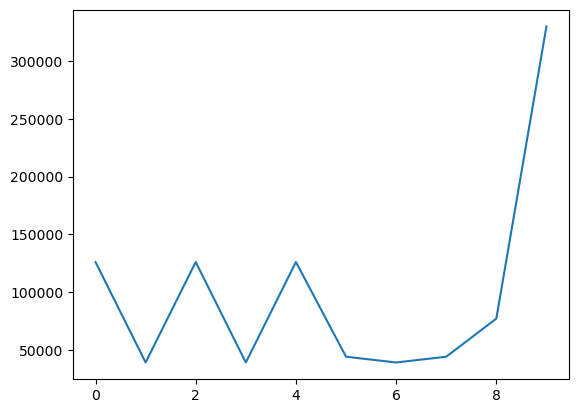

In [167]:
compare["Parameters"].plot()

<Axes: >

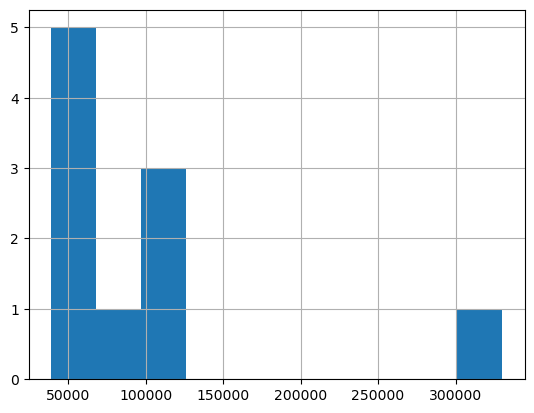

In [168]:
compare["Parameters"].hist()

In [169]:
compare["Price"] = compare["Price"].replace('[\$\,]', '', regex=True).astype(float)
compare

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/z_/m5ljv2sn2kqf6130ryrsw_c00000gn/T/ipykernel_8579/2770494005.py:1: SyntaxWarning: invalid escape sequence '\$'
  compare["Price"] = compare["Price"].replace('[\$\,]', '', regex=True).astype(float)


,Make,Colour,Time,Parameters,Price
0,OpenAI,White,7,126000,20.0
1,xAI,Red,6,39000,7.0
2,OpenAI,Blue,6,126000,20.0
3,xAI,Black,8,39000,13.0
4,OpenAI,White,5,126000,7.0
5,feetsAI,Green,9,44000,20.0
6,xAI,Blue,6,39000,30.0
7,feetsAI,Blue,2,44000,20.0
8,xAI,White,4,77000,13.0
9,OpenAI,White,2,330000,25.0


<Axes: >

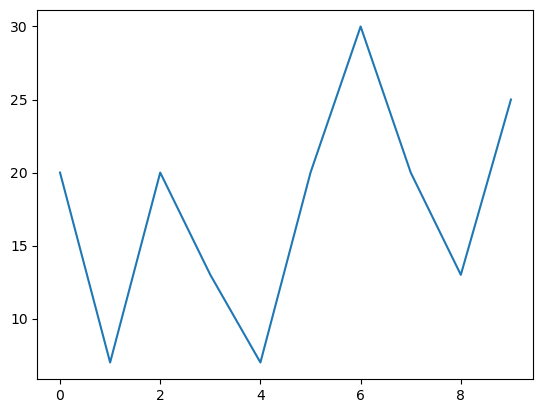

In [170]:
compare["Price"].plot()

## Manipulating Data

In [171]:
compare["Make"].str.lower()

0     openai
1        xai
2     openai
3        xai
4     openai
5    feetsai
6        xai
7    feetsai
8        xai
9     openai
Name: Make, dtype: object

In [172]:
# In case of missing data we make every Nan the same number of average
# compare_missing["Price"].fillna(compare_missing["Price"].mean(), inplace=False
# Or we can simply drop them
# compare-missing.dropna(inplace=True)

In [173]:
# Adding column to the table
new_column = pd.Series([2023, 2024, 2022, 2025, 2023])
compare["Year"] = new_column 
compare

,Make,Colour,Time,Parameters,Price,Year
0,OpenAI,White,7,126000,20.0,2023.0
1,xAI,Red,6,39000,7.0,2024.0
2,OpenAI,Blue,6,126000,20.0,2022.0
3,xAI,Black,8,39000,13.0,2025.0
4,OpenAI,White,5,126000,7.0,2023.0
5,feetsAI,Green,9,44000,20.0,NaN
6,xAI,Blue,6,39000,30.0,NaN
7,feetsAI,Blue,2,44000,20.0,NaN
8,xAI,White,4,77000,13.0,NaN
9,OpenAI,White,2,330000,25.0,NaN


In [180]:
#To fill Nan with a value
compare["Year"].fillna(2024,inplace=True)
compare

/var/folders/z_/m5ljv2sn2kqf6130ryrsw_c00000gn/T/ipykernel_8579/986048294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  compare["Year"].fillna(2024,inplace=True)


,Make,Colour,Time,Parameters,Price,Year
0,OpenAI,White,7,126000,20.0,2023.0
1,xAI,Red,6,39000,7.0,2024.0
2,OpenAI,Blue,6,126000,20.0,2022.0
3,xAI,Black,8,39000,13.0,2025.0
4,OpenAI,White,5,126000,7.0,2023.0
5,feetsAI,Green,9,44000,20.0,2024.0
6,xAI,Blue,6,39000,30.0,2024.0
7,feetsAI,Blue,2,44000,20.0,2024.0
8,xAI,White,4,77000,13.0,2024.0
9,OpenAI,White,2,330000,25.0,2024.0


In [177]:
#Randomizing data
#compare-random=compare.sample(frac=1)